In [1]:
pip install ucimlrepo


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from ucimlrepo import fetch_ucirepo

# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

In [3]:
df = pd.concat([X, y], axis = 1)

In [4]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [6]:
df['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

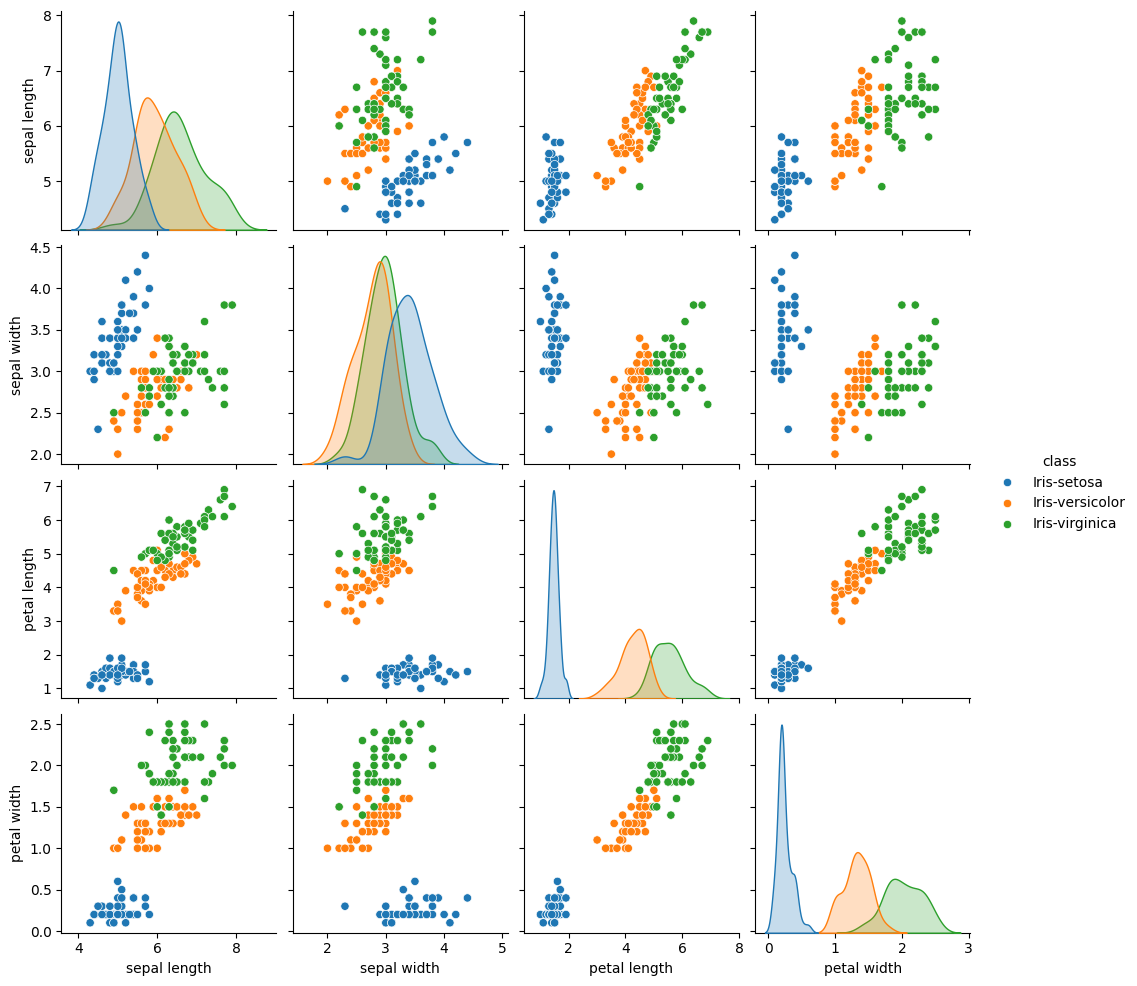

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue = "class")
plt.show()

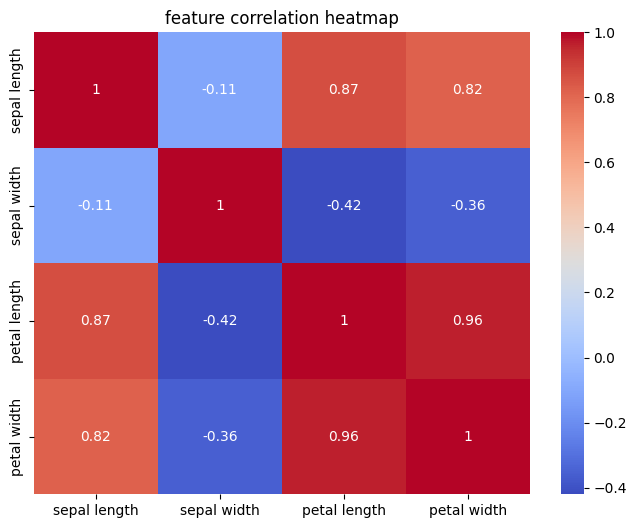

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("feature correlation heatmap")
plt.show()

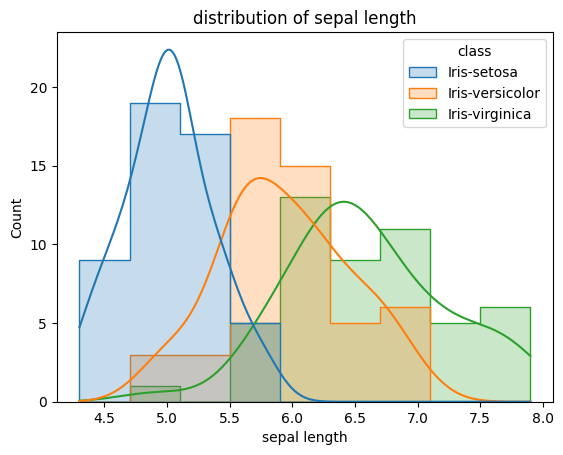

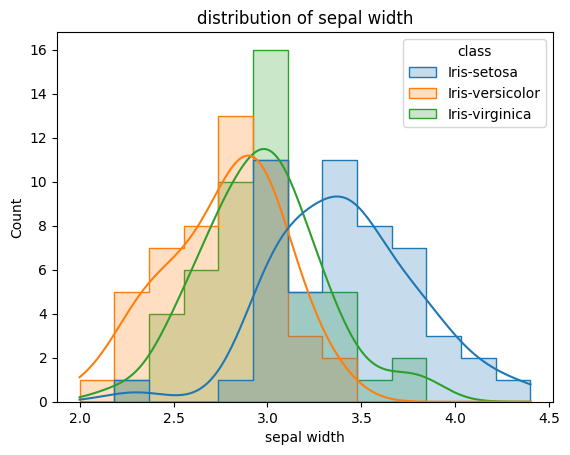

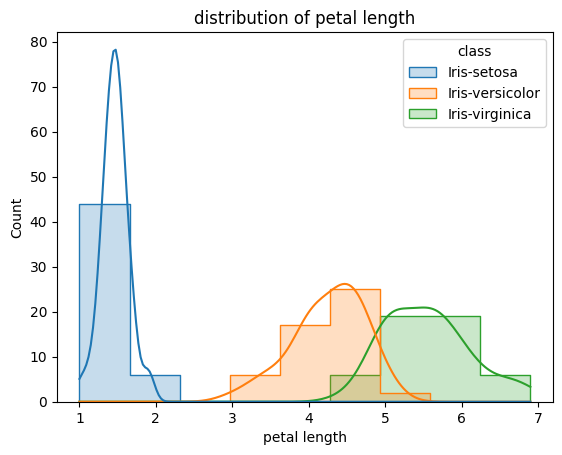

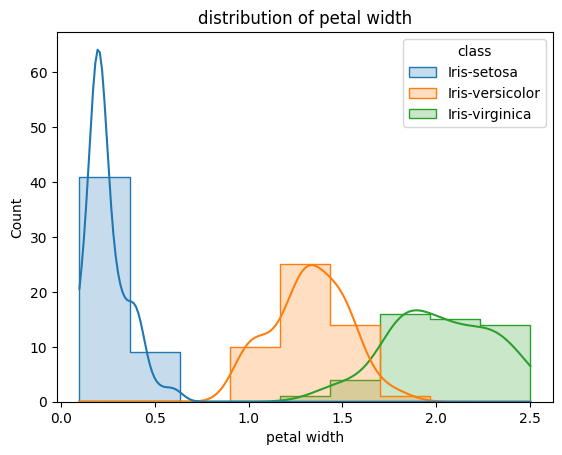

In [9]:
for col in X.columns:
    sns.histplot(data=df, x=col, hue='class', kde=True, element='step')
    plt.title(f"distribution of {col}")
    plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class_encoded'] = le.fit_transform(df['class'])

In [13]:
df.head(2)

,sepal length,sepal width,petal length,petal width,class,class_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0


In [14]:
x = df.drop(columns=['class', 'class_encoded'])
y = df['class_encoded']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 43, test_size = 0.2, stratify=y)

In [16]:
x_train.shape, y_train.shape

((120, 4), (120,))

# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
lr = LogisticRegression(max_iter=200)
lr.fit(x_train, y_train)
lr.score(x_train, y_train)*100, lr.score(x_test, y_test) * 100

(98.33333333333333, 100.0)

In [19]:
lr.coef_, lr.intercept_

(array([[-0.38846658,  0.90326713, -2.36178614, -1.03508076],
        [ 0.56308805, -0.37634446, -0.15167112, -0.90251544],
        [-0.17462147, -0.52692267,  2.51345726,  1.9375962 ]]),
 array([  9.12658462,   1.81784175, -10.94442636]))

In [20]:
y_prd_lr = lr.predict(x_test)
print(confusion_matrix(y_test, y_prd_lr))
print(classification_report(y_test, y_prd_lr, target_names=le.classes_))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# K-Nearest Neighbors(KNN)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knn.score(x_train, y_train)*100, knn.score(x_test, y_test)*100

(96.66666666666667, 96.66666666666667)

In [22]:
y_prd_knn = knn.predict(x_test)
print(confusion_matrix(y_test, y_prd_knn))
print(classification_report(y_test, y_prd_knn, target_names=le.classes_))

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [23]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)
svc.score(x_train, y_train)*100, svc.score(x_test, y_test)*100

(97.5, 100.0)

In [24]:
y_prd_svc = svc.predict(x_test)
print(confusion_matrix(y_test, y_prd_svc))
print(classification_report(y_test, y_prd_svc, target_names=le.classes_))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [25]:
from sklearn.model_selection import cross_val_score

models = {
    "logisticRegression": LogisticRegression(max_iter=200),
    "k-nearestNeighbors": KNeighborsClassifier(n_neighbors=3),
    "svm": SVC(kernel='linear')
}

for name, model in models.items():
    scores = cross_val_score(model, x, y, cv=5)
    print(f"{name}: average accuracy = {scores.mean():.4f}")

logisticRegression: average accuracy = 0.9733
k-nearestNeighbors: average accuracy = 0.9667
svm: average accuracy = 0.9800
